In [2]:
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('student_scores.csv')
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'student_scores.csv'

In [ ]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=df, x='Hours',y='Scores',width=700)
fig.update_layout(title='Regression of total_bill vs tip')
fig.show()

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Least Mean Square Formula: $y = mx + b$

In [ ]:
y,m,x,b = [0] * 4

Find $ m = \frac {N * \sum\limits _{i=1} ^{N} (x_{i}y_{i}) - \sum\limits _{i=1} ^{N} x_{i}\sum\limits _{i=1} ^{N} y_{i}} {N * \sum\limits _{i=1} ^{N} (x_{i} ^ 2) - \sum\limits _{i=1} ^{N} (x_{i})^2} $ 

In [ ]:
x = df['Hours'].values
y = df['Scores'].values

In [ ]:
N = len(x)
m = ((N * sum(x * y)) - (sum(x) * sum(y)) ) / (N * sum(x**2) - sum(x) ** 2)
m

9.77580339078746

In [ ]:
b = (sum(y) - m * sum(x))/ N
b

2.483673405373247

In [ ]:
import numpy as np
y_hat = m * x + b

In [ ]:
import plotly.graph_objects as go

fig =go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='dataset'))
fig.add_trace(go.Scatter(x=x, y=y_hat, mode='lines+markers', name='y hat'))
fig.update_xaxes(title_text='Hours')
fig.update_yaxes(title_text='Scores')
fig.update_layout(width=700, title='Statistical Linear Regression')
fig.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
mae = sum(abs(y-y_hat))/N 
mae

4.972805319866373

In [ ]:
mse = sum((y-y_hat)**2)/N 
mse

28.882730509245466

In [ ]:
rmse = mse ** 0.5
rmse

5.374265578592619

### With sklearn

In [ ]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [ ]:
df['Scores'].values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

[2.82689235]
[[9.68207815]]


In [ ]:
score = model.coef_[0][0] * X_train + model.intercept_[0]

In [ ]:
score_test = model.coef_[0][0] * X_test + model.intercept_[0]

In [ ]:
fig =go.Figure()
fig.add_trace(go.Scatter(x=X_train.flatten(), y=y_train.flatten(), mode='markers', name='data train'))
# fig.add_trace(go.Scatter(x=X_train.flatten(), y=score.flatten(), mode='lines+markers', name='y hat'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_test.flatten(), mode='markers', name='data test'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=score_test.flatten(), mode='lines+markers', name='y hat'))
fig.update_xaxes(title_text='Hours')
fig.update_yaxes(title_text='Scores')
fig.update_layout(width=700, title='Train, Test, Pred')
fig.show()

NameError: name 'go' is not defined

In [ ]:
y_pred = model.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import scipy.stats

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
corr = r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of Determination(R2): {corr}') # [-1,1]
print( scipy.stats.pearsonr(y_test.flatten(), y_pred.flatten()))


Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35
Coefficient of Determination(R2): 0.9678055545167994
PearsonRResult(statistic=0.9852891547134042, pvalue=0.0021371236463068022)


### Without splitting

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

[2.48367341]
[[9.77580339]]


In [ ]:
y_pred_pure = model.predict(X)

https://towardsdatascience.com/r%C2%B2-or-r%C2%B2-when-to-use-what-4968eee68ed3#:~:text=The%20Pearson%20correlation%20coefficient%20(r,the%20strength%20of%20a%20model.
1. Correlation coefficient: “How good is this predictor?”
Correlation coefficients help quantify mutual relationships or connections between two things. Some well-known correlated quantities are weight and height of humans, house value and its area, and, as we saw in the above example, a store’s revenue and its parking lot occupancy.

One of the most widely used correlation coefficients is the Pearson correlation coefficient (usually denoted by r). Graphically, this can be understood as “how close is the data to the line of best fit?”

If the points are very far away, r is close to 0
If the points are very close to the line and the line is sloping upward, r is close to +1
If the points are very close to the line and the line is sloping downward, r is close to −1
Notice how the figure above has missing numbers on the axes? That is because the Pearson correlation coefficient is independent of the magnitude of the numbers; it is sensitive to relative changes only. This property is usually desirable since variables rarely have the same magnitudes. E.g., Walmart’s stock price is tens of dollars whereas the numbers of cars parked in front of its stores are in the thousands.

However, due to its insensitivity to actual magnitude, the Pearson correlation coefficient can be misused to give a false sense of confidence when two things are indeed expected to have the same magnitude.

To make matters worse, some people take the square of the Pearson correlation coefficient to bring it between 0 and +1 and call it r². But this is not to be confused with the coefficient of determination (R²) which is explained below.

2. Coefficient of determination: “How good is this model?”

Unlike the Pearson correlation coefficient, the coefficient of determination measures how well the predicted values match (and not just follow) the observed values. It depends on the distance between the points and the 1:1 line (and not the best-fit line) as shown above. Closer the data to the 1:1 line, higher the coefficient of determination.

The coefficient of determination is often denoted by R². However, it is not the square of anything. It can range from any negative number to +1.

R² = +1 indicates that the predictions match the observations perfectly
R² = 0 indicates that the predictions are as good as random guesses around the mean of the observed values
Negative R² indicates that the predictions are worse than random
Since R² indicates the distance of points from the 1:1 line, it does depend on the magnitude of the numbers (unlike r²).

In [ ]:
mae = mean_absolute_error(y, y_pred_pure)
mse = mean_squared_error(y, y_pred_pure)
rmse = np.sqrt(mse)
corr = r2_score(y, y_pred_pure)

print(f'Mean absolute error: {mae:.2f}, from mean of test {y.mean()}')
print(f'Mean squared error: {mse:.2f}, from mean of test squared {y.mean() ** 2}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of Determination(R2): {corr}') # range from -inf to 1, where -inf indicate worst fit of line, and 1 a perfect fit of line
print('Correlation Coefficient (r pearson value):', scipy.stats.pearsonr(y.flatten(), y_pred_pure.flatten())[0]) # range from (-1,1)
print('p value:', scipy.stats.pearsonr(y.flatten(), y_pred_pure.flatten())[1])

Mean absolute error: 4.97, from mean of test 51.48
Mean squared error: 28.88, from mean of test squared 2650.1903999999995
Root mean squared error: 5.37
Coefficient of Determination(R2): 0.9529481969048356
Correlation Coefficient (r pearson value): 0.9761906560220885
p value: 9.132624467459856e-17


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


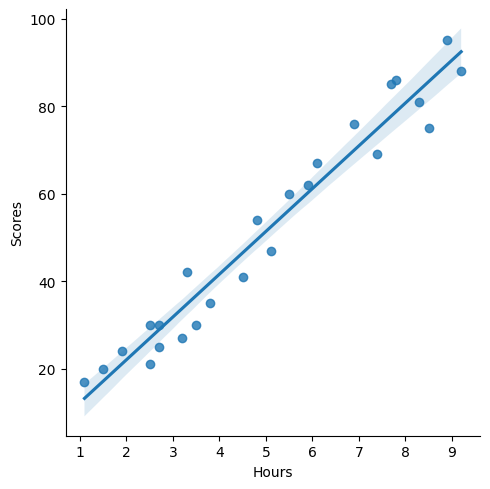

In [ ]:
sns.lmplot(data=df,x='Hours',y='Scores')